In [8]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [10]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Path to the dataset
data_dir = r'C:\Users\Vybha\Downloads\archive (4)\TrashType_Image_Dataset'

# Class labels
classes = ['metal', 'glass', 'paper', 'trash', 'cardboard', 'plastic']

# Load images and labels
X = []
y = []

for i, class_name in enumerate(classes):
    class_dir = os.path.join(data_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))  # Load and resize image
        img_array = tf.keras.preprocessing.image.img_to_array(img)  # Convert image to array
        X.append(img_array)
        y.append(i)  # Append label

# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

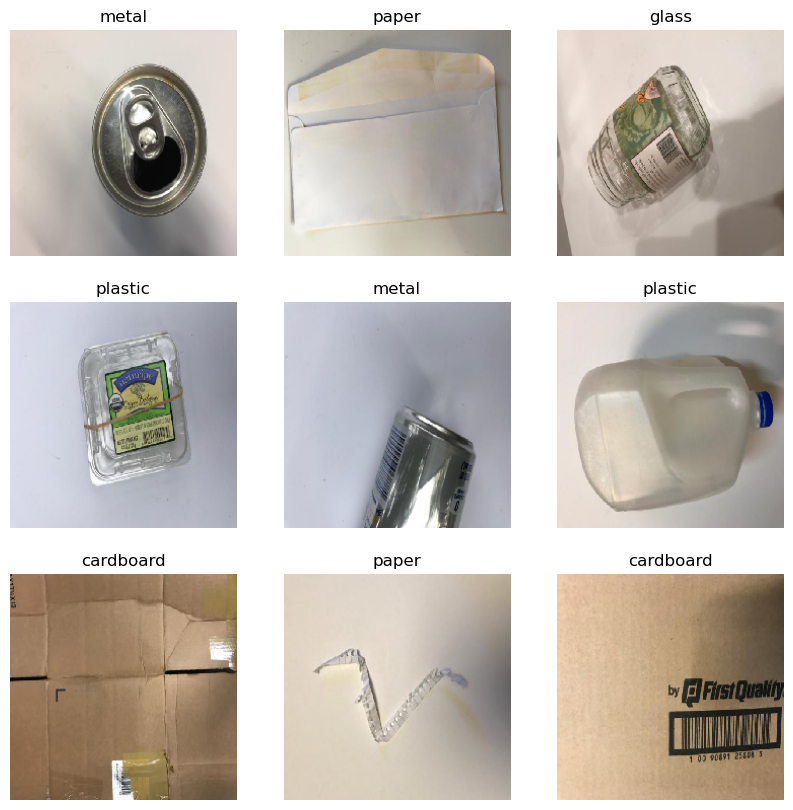

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.title(classes[y_train[i]])
    plt.axis('off')
plt.show()

In [13]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load ResNet50 without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add new layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling
x = Dense(1024, activation='relu')(x)  # Fully connected layer
predictions = Dense(len(classes), activation='softmax')(x)  # Output layer

# Build the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.5722 - loss: 1.6448 - val_accuracy: 0.8320 - val_loss: 0.5081
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.8717 - loss: 0.3648 - val_accuracy: 0.8715 - val_loss: 0.4125
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.9228 - loss: 0.2150 - val_accuracy: 0.8577 - val_loss: 0.4475
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.9582 - loss: 0.1462 - val_accuracy: 0.8577 - val_loss: 0.4654
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9725 - loss: 0.0906 - val_accuracy: 0.8715 - val_loss: 0.4312
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9830 - loss: 0.0603 - val_accuracy: 0.8538 - val_loss: 0.5311
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9954 - loss: 0.0290 - val_accuracy: 0.8715 - val_loss: 0.4380
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.99

In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 891ms/step - accuracy: 0.8771 - loss: 0.4252
Test Accuracy: 0.8715415000915527
